# Analysis of Video and Image Data for cropping and texture features
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2023: Add prototype
* 10th Aug 2023: Adds saving dataframes in cvs files
* 26th Sep 2023: Reads data from Thu-24-Aug-2023

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [15]:
from rtt4ssa.utils.utils import video_to_tensor, compute_texture_array_and_plot
from rtt4ssa.utils.utils import data_frame_of_texture_analysis
from rtt4ssa.utils.utils import get_and_plot_imu_data_analysis

import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/rtt4ssa'

###########################
###SET DATA_PATH 
#DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023' 
DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023'
FULL_REPO_DATA_PATH = HOME_PATH +'/' + DATA_PATH

## Printing Versions and paths
print(FULL_REPO_DATA_PATH)
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')

# ###########################
# ### experiments_13-Jul-2023
# AVI_FILE_01 = 'test01.avi'
# CSV_FILE_01 = 'test01.avi.csv'
# FULL_PATH_AND_AVI_FILE_01 = os.path.join(FULL_REPO_DATA_PATH , AVI_FILE_01)
# FULL_PATH_AND_CSV_FILE_01 = os.path.join(FULL_REPO_DATA_PATH , CSV_FILE_01)
# print(f'FULL_REPO_DATA_PATH: {FULL_REPO_DATA_PATH}')
# print(f'FULL_PATH_AND_CSV_FILE: {FULL_PATH_AND_CSV_FILE_01}')
# print(f'FULL_PATH_AND_AVI_FILE: {FULL_PATH_AND_AVI_FILE_01}')

/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023
PyTorch Version: 2.0.0.post200
pandas Version: 2.0.3
numpy Version: 1.25.2
cv2 Version: 4.8.0
skimage Version: 0.21.0


# Reading video and plotting frames

In [29]:
PARTICIPANTNN_TESTNN = 'participant01/participant01-test01-rep01-1g-5mins' #51328
# PARTICIPANTNN_TESTNN = 'participant01/participant01-test01-rep02-1g-5mins' #51178
# PARTICIPANTNN_TESTNN = 'participant01/participant01-test02-rep01-1g-5mins' #49183
# PARTICIPANTNN_TESTNN = 'participant01/participant01-test02-rep02-1g-5mins' #47577
# PARTICIPANTNN_TESTNN = 'participant01/participant01-test03-rep01-1g-5mins' #48688
# PARTICIPANTNN_TESTNN = 'participant01/participant01-test03-rep02-1g-5mins'#48789

# PARTICIPANTNN_TESTNN = 'participant02/participant02-test01-rep01-1g-5mins'#49490
# PARTICIPANTNN_TESTNN = 'participant02/participant02-test01-rep02-1g-5mins'#49219
# PARTICIPANTNN_TESTNN = 'participant02/participant02-test02-rep01-1g-5mins'#48043
# PARTICIPANTNN_TESTNN = 'participant02/participant02-test02-rep02-1g-5mins'#49606
# PARTICIPANTNN_TESTNN = 'participant02/participant02-test03-rep01-1g-5mins'#48875
# PARTICIPANTNN_TESTNN = 'participant02/participant02-test03-rep02-1g-5mins'#48050


CSV_FILENAME_FOR_TEXTURE_ANALYSIS=PARTICIPANTNN_TESTNN+'.csv'
FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN_TESTNN+'.avi')
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN_TESTNN+'.avi.csv')

start_frame_number = 000
end_frame_number = 10000
total_number_of_frames = end_frame_number - start_frame_number


video, frames_timestam = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')


  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023/participant01/participant01-test01-rep01-1g-5mins.avi
    Frame_height=480, frame_width=640 fps=120 nframes=51328 
  
  
num_frames: 9999
height: 480
width: 640


# Generating texture_analysis_array and plotting frames and histograms

frame_i: 0, timestamp 00:00:0.000


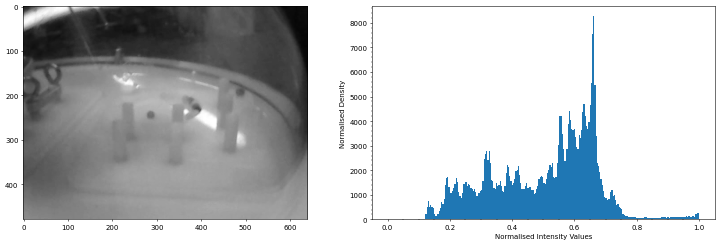

In [33]:
# # This takes a while as it goes check each frame, so you might consider to comment this lines
# display_factor = 10000    
# texture_analysis_array = compute_texture_array_and_plot(video, frames_timestam, display_factor)


# Plotting texture analysis of all frames in the video

In [34]:
df_texture_analysis = data_frame_of_texture_analysis(texture_analysis_array, start_frame_number, end_frame_number)


In [35]:
print(df_texture_analysis)


      frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0           0  3.308281     0.999091       0.866927  0.058461     0.698238   
1           1  3.308281     0.999091       0.866927  0.058461     0.698238   
2           2  3.308281     0.999091       0.866927  0.058461     0.698238   
3           3  3.308281     0.999091       0.866927  0.058461     0.698238   
4           4  3.308281     0.999091       0.866927  0.058461     0.698238   
...       ...       ...          ...            ...       ...          ...   
9994     9994  8.506214     0.998824       1.322124  0.060407     0.632122   
9995     9995  8.506214     0.998824       1.322124  0.060407     0.632122   
9996     9996  8.506214     0.998824       1.322124  0.060407     0.632122   
9997     9997  8.506214     0.998824       1.322124  0.060407     0.632122   
9998     9998  8.506214     0.998824       1.322124  0.060407     0.632122   

           ASM  Contrast_normalised  Correlation_normalised  \


## Reading and ploting csv files

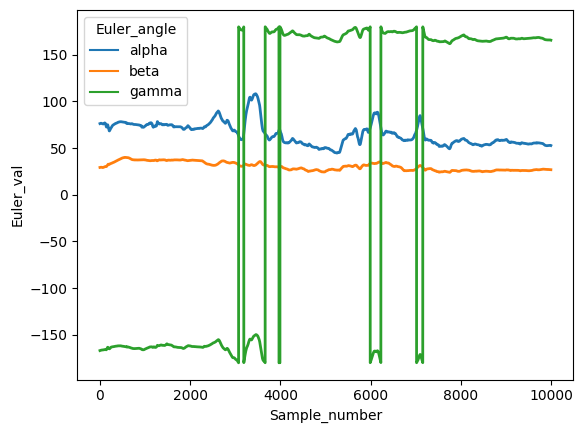

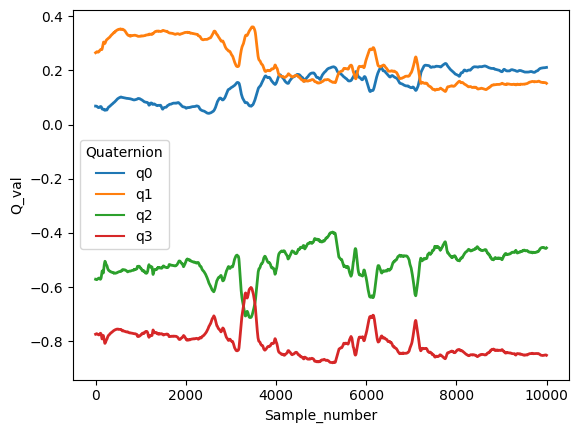

In [36]:
df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE, start_frame_number, end_frame_number)
    

In [10]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,76.263512
1,1,alpha,76.268105
2,2,alpha,76.277130
3,3,alpha,76.290985
4,4,alpha,76.309441
...,...,...,...
295,95,gamma,-165.901642
296,96,gamma,-165.882309
297,97,gamma,-165.863464
298,98,gamma,-165.835419


In [11]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.068419
1,1,q0,0.068369
2,2,q0,0.068327
3,3,q0,0.068299
4,4,q0,0.068282
...,...,...,...
395,95,q3,-0.772171
396,96,q3,-0.771887
397,97,q3,-0.771593
398,98,q3,-0.771242


In [12]:
df

,Sample_number,epoch machine time (ns),Timestamp for frame capture.read (ns),Timestamp LPMSB2 (s),Quaternions_LPMSB2,Euler_LPMSB2,A,B,C,q0,q1,q2,q3
0,0,1692882663543262563,1692882663543480781,1212.310,"[0.06841902434825897, 0.2655182480812073, -0.5...","[76.26351165771484, 29.279926300048828, -166.9...",76.263512,29.279926,-166.927963,0.068419,0.265518,-0.570912,-0.773872
1,1,1692882663579540015,1692882663543480781,1212.315,"[0.06836933642625809, 0.2656002640724182, -0.5...","[76.26810455322266, 29.283796310424805, -166.9...",76.268105,29.283796,-166.915955,0.068369,0.265600,-0.570907,-0.773852
2,2,1692882663587530055,1692882663543480781,1212.320,"[0.06832683086395264, 0.2656897306442261, -0.5...","[76.27713012695312, 29.288410186767578, -166.9...",76.277130,29.288410,-166.902878,0.068327,0.265690,-0.570928,-0.773810
3,3,1692882663596395389,1692882663543480781,1212.325,"[0.0682985931634903, 0.2657907009124756, -0.57...","[76.29098510742188, 29.29462432861328, -166.88...",76.290985,29.294624,-166.888977,0.068299,0.265791,-0.570976,-0.773742
4,4,1692882663604048535,1692882663543480781,1212.330,"[0.06828176230192184, 0.26590365171432495, -0....","[76.30944061279297, 29.30230140686035, -166.87...",76.309441,29.302301,-166.874039,0.068282,0.265904,-0.571050,-0.773651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1692882664199538029,1692882664149512146,1212.785,"[0.06551546603441238, 0.27430564165115356, -0....","[76.59014129638672, 29.883014678955078, -165.9...",76.590141,29.883015,-165.901642,0.065515,0.274306,-0.569400,-0.772171
96,96,1692882664205344573,1692882664149512146,1212.790,"[0.06565319746732712, 0.2745361924171448, -0.5...","[76.64374542236328, 29.908843994140625, -165.8...",76.643745,29.908844,-165.882309,0.065653,0.274536,-0.569658,-0.771887
97,97,1692882664211339971,1692882664149512146,1212.795,"[0.06579788029193878, 0.2747611701488495, -0.5...","[76.69942474365234, 29.93438148498535, -165.86...",76.699425,29.934381,-165.863464,0.065798,0.274761,-0.569932,-0.771593
98,98,1692882664217051636,1692882664149512146,1212.800,"[0.06593840569257736, 0.27506202459335327, -0....","[76.7662353515625, 29.965646743774414, -165.83...",76.766235,29.965647,-165.835419,0.065938,0.275062,-0.570245,-0.771242


In [13]:
# TO ADD IN UTILS on 26Sep2023
# ## Comment/uncomment any of the following lines to show however axis you would like to see in the plot
# ## TODO: https://seaborn.pydata.org/generated/seaborn.lineplot.html

# ### Ploting all texture features 
# fig, axs = plt.subplots(2,3, figsize=(12, 6))

# df_texture_analysis.plot(x='frame_i', y='Contrast', ax=axs[0,0] )
# # axs[0,0].set_ylim((0,15)) 

# df_texture_analysis.plot(x='frame_i', y='Correlation', ax=axs[0,1])
# # # axs[0,2].set_ylim((0.997,0.999)) 

# df_texture_analysis.plot(x='frame_i', y='Dissimilarity', ax=axs[0,2])
# # axs[0,1].set_ylim((0.75,1.5)) 

# df_texture_analysis.plot(x='frame_i', y='Energy', ax=axs[1,0])

# df_texture_analysis.plot(x='frame_i', y='Homogeneity', ax=axs[1,1])
# df_texture_analysis.plot(x='frame_i', y='ASM', ax=axs[1,2])

# plt.show()





# ### Ploting all texture features 
# fig, axs = plt.subplots(2,3, figsize=(12, 6))

# df_texture_analysis.plot(x='frame_i', y='Contrast_normalised', ax=axs[0,0] )
# # axs[0,0].set_ylim((0,15)) 

# df_texture_analysis.plot(x='frame_i', y='Correlation_normalised', ax=axs[0,1])
# # # axs[0,2].set_ylim((0.997,0.999)) 

# df_texture_analysis.plot(x='frame_i', y='Dissimilarity_normalised', ax=axs[0,2])
# # axs[0,1].set_ylim((0.75,1.5)) 

# df_texture_analysis.plot(x='frame_i', y='Energy_normalised', ax=axs[1,0])

# df_texture_analysis.plot(x='frame_i', y='Homogeneity_normalised', ax=axs[1,1])
# df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=axs[1,2])

# plt.show()



# ### Ploting single texture feature
# ax = plt.gca()
# df_texture_analysis.plot(x='frame_i', y='ASM', ax=ax)
# # plt.ylim((0.003,0.005))
# plt.grid()
# plt.show()


# ax = plt.gca()
# df_texture_analysis.plot(x='frame_i', y='ASM_normalised', ax=ax)
# plt.grid()
# plt.show()

